In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from iqradre.prod.idcard import IDCardPredictor
import matplotlib.pyplot as plt

import pandas as pd
pd.set_option("max_rows", None)
import imutils

In [3]:
%%time
config = {
    'segmentor': f'../weights/segment/unet_sfeat32_v5.pth',
    'detector': f'../weights/detect/craft_ktp_ohem.pth.tar',
    'recognitor': f'../weights/recog/ocrnet_pretrained_ktp_v3.pth',
    'extractor': f'../weights/extract/layoutlm_v2_ktp_20kv1_vacc_0.981_vloss_0.26.pth',
    'tokenizer': "indobenchmark/indobert-base-p2"   
}

idcard = IDCardPredictor(config, device='cpu')

INFO: Load all model, please wait...


Some weights of the model checkpoint at microsoft/layoutlm-base-uncased were not used when initializing LayoutLMForTokenClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing LayoutLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing LayoutLMForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of LayoutLMForTokenClassification were not initialized from the model checkpoint at microsoft

INFO: All model has been loaded!
CPU times: user 14.8 s, sys: 1.05 s, total: 15.8 s
Wall time: 11.2 s


(1040, 614)
CPU times: user 13.8 s, sys: 194 ms, total: 14 s
Wall time: 1.77 s


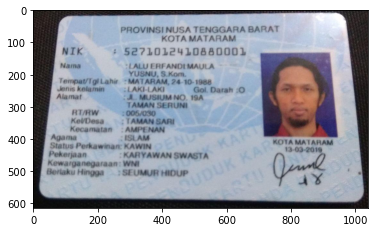

In [43]:
%%time
# impath = 'images/ktp_aan/ktp2.jpg'
impath = 'images/fandi_ktp/ktp5.jpg'
# impath = '/data/idcard/combined/sampled/14907_image.jpg'
pred_data = idcard.predict(impath, low_text=0.2, min_size_percent=3, dsize=(750,1000))

In [44]:
pred_data.keys()

dict_keys(['prediction', 'dataframe', 'image', 'segment_image', 'rotated_image', 'images_patch', 'boxes', 'texts', 'score_text', 'score_list', 'score'])

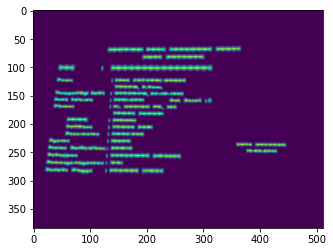

In [45]:
plt.imshow(pred_data['score']);plt.show()

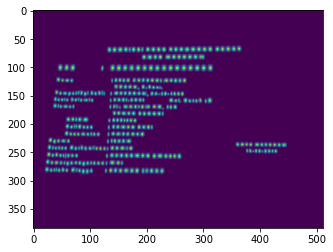

In [46]:
plt.imshow(pred_data['score_text']);plt.show()

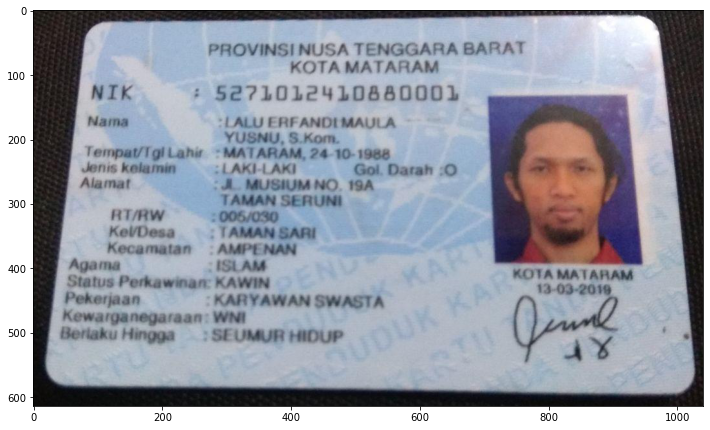

In [47]:
plt.figure(figsize=(12,12))
plt.imshow(pred_data['segment_image']);plt.show()

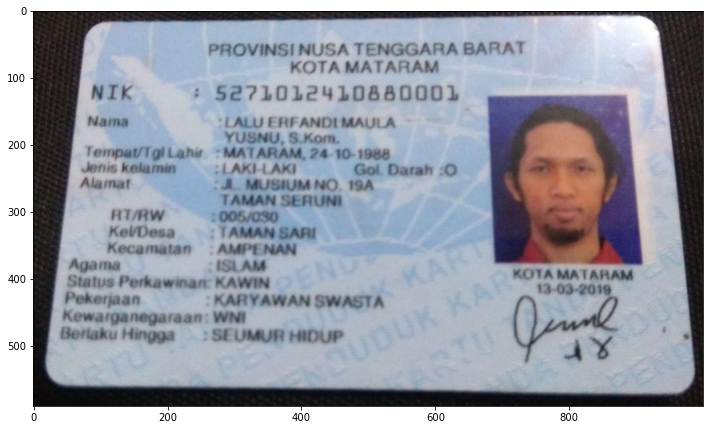

In [48]:
plt.figure(figsize=(12,12))
plt.imshow(pred_data['rotated_image']);plt.show()

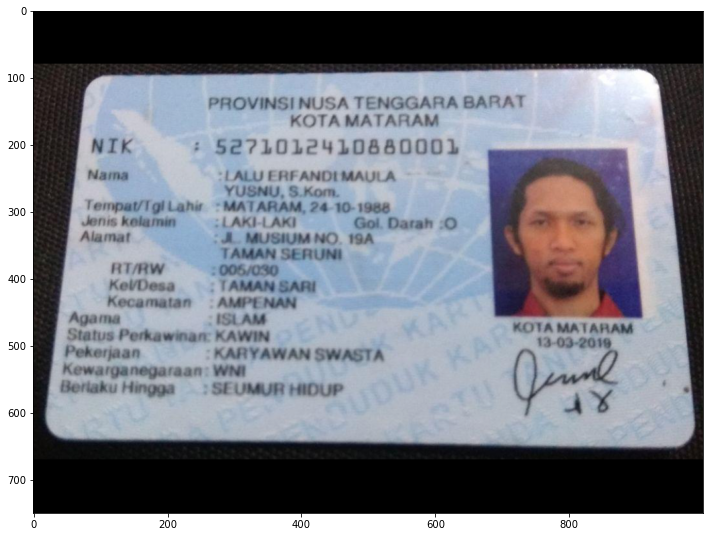

In [49]:
plt.figure(figsize=(12,12))
plt.imshow(pred_data['image']);plt.show()

In [50]:
pred_data['prediction']

{'provinsi': 'PROVINSI NUSA TENGGARA BARAT',
 'kabupaten': 'KOTA MATARAM',
 'nik': '5271012410880001',
 'nama': 'LALU YUSNU, ERFANDI S.Kela MAULA',
 'ttl': 'MATARAM, 24-10-1988',
 'gender': 'LAKI-LAKI',
 'goldar': 'O.',
 'alamat': 'JL. TAMAN MUSIUM SERUNI NO. 19A',
 'rtrw': '005/030',
 'kelurahan': 'TAMAN SARI',
 'kecamatan': 'AMPENAN',
 'agama': 'ISLAM',
 'perkawinan': 'KAWIN',
 'pekerjaan': 'KARYAWAN SWASTA',
 'kewarganegaraan': 'WNI',
 'berlaku': 'SEUMUR HIDUP',
 'sign_place': 'KOTA MATARAM',
 'sign_date': '13-03-2019'}

In [51]:
pred_data['dataframe']

,words,bboxes,tokens,labels,gseq,wseq
0,BARAT,"[640.0, 122.0, 740.0, 150.0]",barat,L-VAL_PROV,0,0
1,TENGGARA,"[476.0, 124.0, 638.0, 152.0]",tenggara,I-VAL_PROV,1,0
2,PROVINSI,"[260.0, 126.0, 394.0, 154.0]",provinsi,U-FLD_PROV,2,0
3,NUSA,"[394.0, 126.0, 474.0, 152.0]",nusa,B-VAL_PROV,3,0
4,KOTA,"[382.0, 152.0, 462.0, 178.0]",kota,U-FLD_KAB,4,0
5,MATARAM,"[464.0, 152.0, 610.0, 178.0]",mataram,U-VAL_KAB,5,0
6,NIK,"[84.0, 188.0, 152.0, 218.0]",nik,U-FLD_NIK,6,0
7,5271012410880001,"[270.0, 188.0, 638.0, 220.0]",52,B-VAL_NIK,7,0
8,5271012410880001,"[270.0, 188.0, 638.0, 220.0]",##71,I-VAL_NIK,7,1
9,5271012410880001,"[270.0, 188.0, 638.0, 220.0]",##012,I-VAL_NIK,7,2


In [52]:
pred_data['texts']

['BARAT',
 'TENGGARA',
 'PROVINSI',
 'NUSA',
 'KOTA',
 'MATARAM',
 'NIK',
 '5271012410880001',
 'Nama',
 'LALU',
 'ERFANDI',
 'MAULA',
 'YUSNU,',
 'S.Kela',
 'Tempat/Tgl',
 'Lahir',
 'MATARAM,',
 '24-10-1988',
 'Jenis',
 'Kelamin',
 'LAKI-LAKI',
 'Gol.',
 'Darah',
 'O.',
 'Alamat',
 'JL.',
 'MUSIUM',
 'NO.',
 '19A',
 'TAMAN',
 'SERUNI',
 'RT/RW',
 '005/030',
 'Kel/Desa',
 'TAMAN',
 'SARI',
 'Kecamatan',
 'AMPENAN',
 'Agama',
 'ISLAM',
 'KOTA',
 'MATARAM',
 'Status',
 'Perkawinan',
 'KAWIN',
 '13-03-2019',
 'Pekerjaan',
 'KARYAWAN',
 'SWASTA',
 'Kewarganegaraan',
 'WNI',
 'Berlaku',
 'Hingga',
 'SEUMUR',
 'HIDUP']

In [53]:
impatch = pred_data['images_patch']
texts = pred_data['texts']

In [54]:
#find max
sizes = [im.shape[1] for im in impatch]
max_index, max_value = max(enumerate(sizes), key=lambda x: x[1])

#create percent by max size
percent_size = [int(size/max_value * 100) for size in sizes]


BARAT percent_size: 27


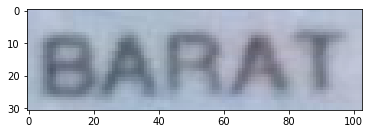

TENGGARA percent_size: 44


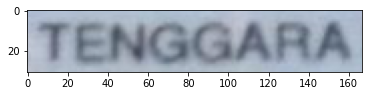

PROVINSI percent_size: 36


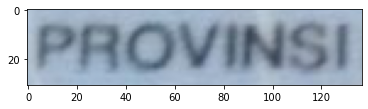

NUSA percent_size: 21


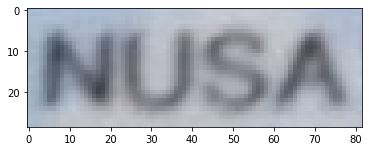

KOTA percent_size: 21


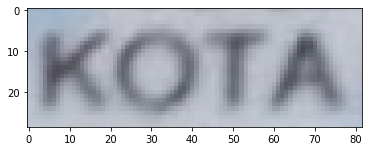

MATARAM percent_size: 39


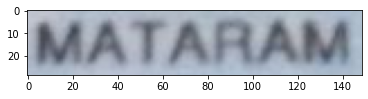

NIK percent_size: 18


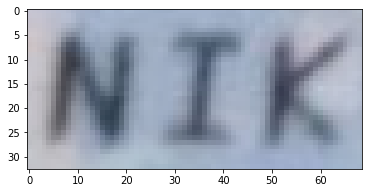

5271012410880001 percent_size: 100


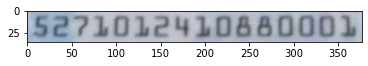

Nama percent_size: 17


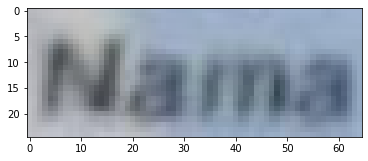

LALU percent_size: 16


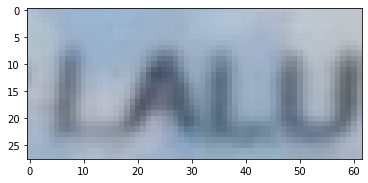

ERFANDI percent_size: 29


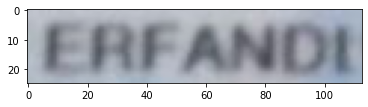

MAULA percent_size: 24


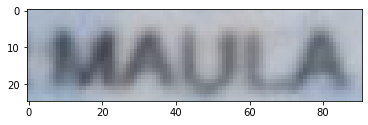

YUSNU, percent_size: 26


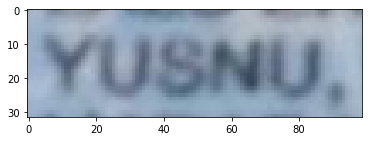

S.Kela percent_size: 22


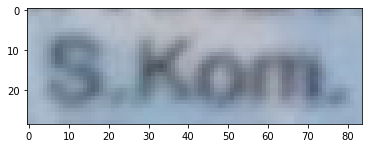

Tempat/Tgl percent_size: 33


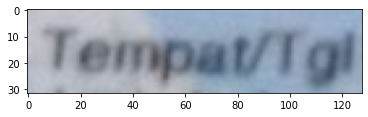

Lahir percent_size: 15


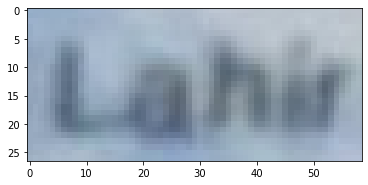

MATARAM, percent_size: 34


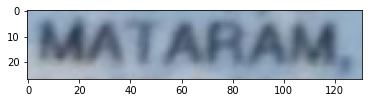

24-10-1988 percent_size: 33


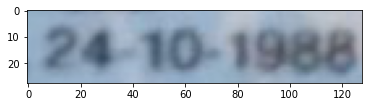

Jenis percent_size: 15


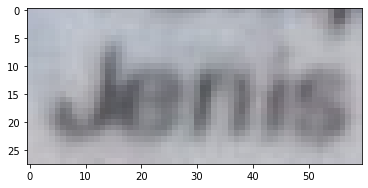

Kelamin percent_size: 23


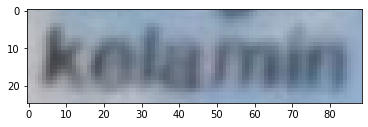

LAKI-LAKI percent_size: 31


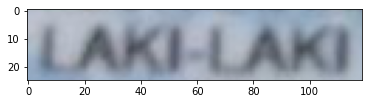

Gol. percent_size: 12


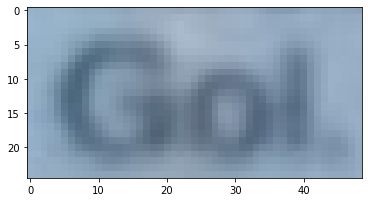

Darah percent_size: 18


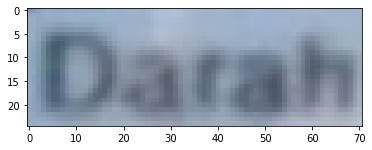

O. percent_size: 7


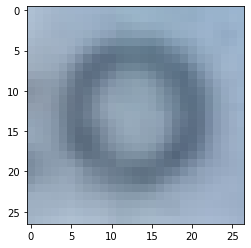

Alamat percent_size: 22


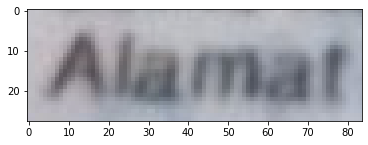

JL. percent_size: 9


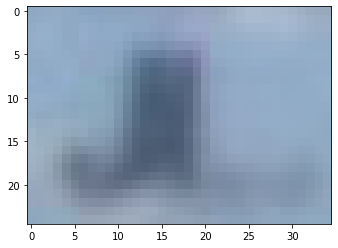

MUSIUM percent_size: 27


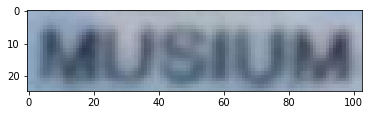

NO. percent_size: 12


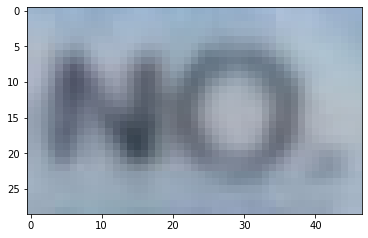

19A percent_size: 11


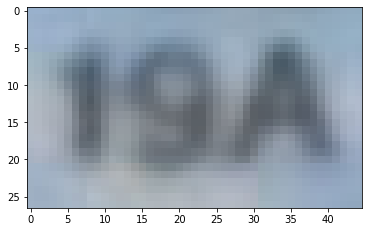

TAMAN percent_size: 23


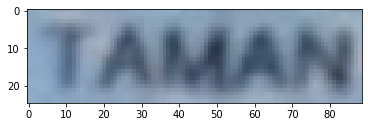

SERUNI percent_size: 27


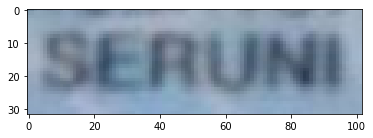

RT/RW percent_size: 23


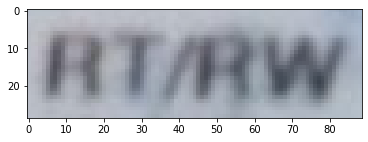

005/030 percent_size: 25


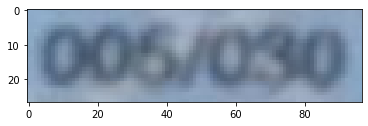

Kel/Desa percent_size: 28


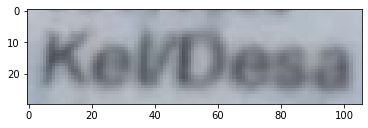

TAMAN percent_size: 24


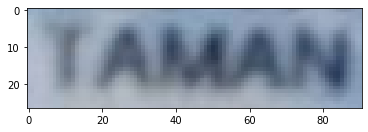

SARI percent_size: 16


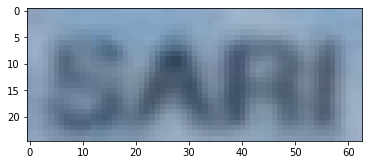

Kecamatan percent_size: 35


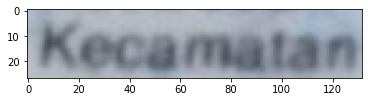

AMPENAN percent_size: 33


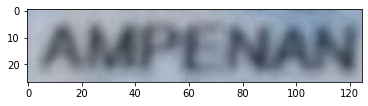

Agama percent_size: 21


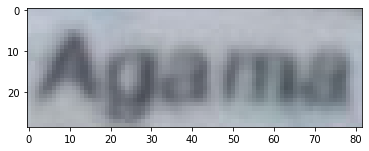

ISLAM percent_size: 22


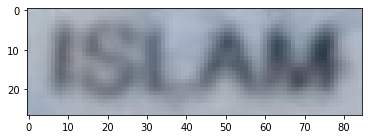

KOTA percent_size: 17


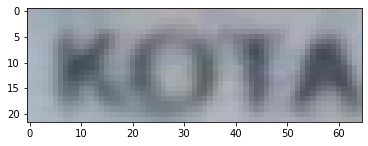

MATARAM percent_size: 31


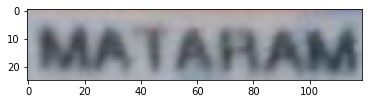

Status percent_size: 20


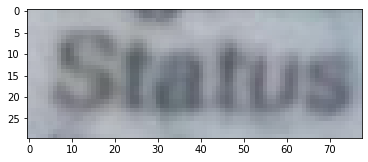

Perkawinan percent_size: 36


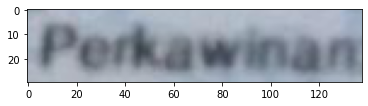

KAWIN percent_size: 23


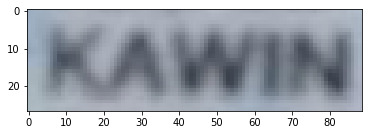

13-03-2019 percent_size: 31


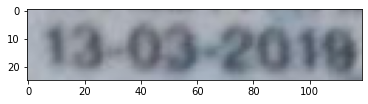

Pekerjaan percent_size: 32


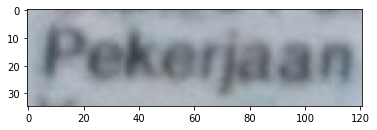

KARYAWAN percent_size: 40


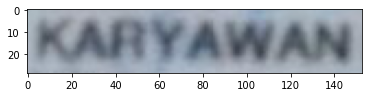

SWASTA percent_size: 29


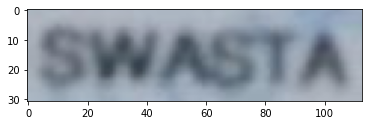

Kewarganegaraan percent_size: 57


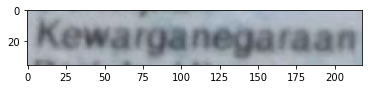

WNI percent_size: 14


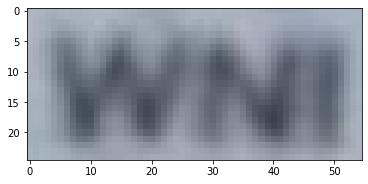

Berlaku percent_size: 24


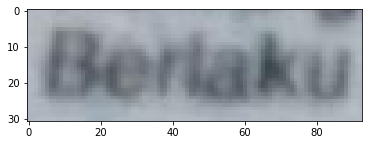

Hingga percent_size: 24


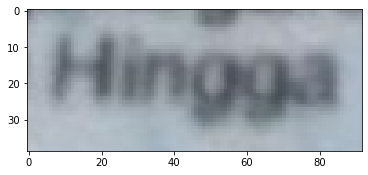

SEUMUR percent_size: 31


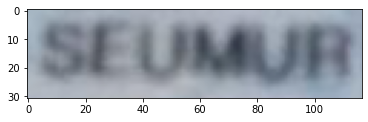

HIDUP percent_size: 23


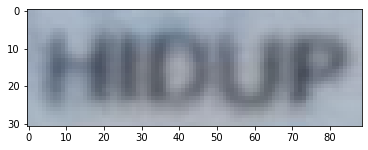

In [55]:
for idx, (patch, txt, pz) in enumerate(zip(impatch, texts, percent_size)):
    print(f'{txt} percent_size: {pz}')    
    plt.imshow(patch);plt.show()
